# Continued Fraction Factoring Algorithm



Take  $$p_{k-1}^2-nq_{k-1}^2 = (-1)^kt_k\ (k\geq 1).$$ Expressing it as congruence modulo $n$; $$p_{k-1}^2\equiv (-1)^kt_k\ (mod\ n).$$  First calculate $p_{k-1}^2 \ (mod\ n)$ and check for a perfect square. Then apply a generalisation of Fermat's factorization scheme.

In [1]:
import math as m
import sympy as sp
def cffa(n,b):             # b is bound for calculations
    xo=sp.sqrt(n)
    ao=m.floor(xo)
    if xo==ao:
        return xo,xo
    else:
        x1=1/(xo-ao)
        a1=m.floor(x1)
        po=ao
        p1=a1*po+1
        qo=1
        q1=a1
        k=1
        while k<b:
            k=k+1
            p=p1
            q=q1
            x1=1/(x1-a1)
            a1=m.floor(x1)
            p1=a1*p1+po
            q1=a1*q1+qo
            k1=(p1*p1)%n
            sq=sp.sqrt(k1)
            sq1=m.floor(sq)
            if sq==sq1:
                f1 = m.gcd(p1-sq1,n)
                if f1%n != 1 and f1%n != 0:
                    return f1,m.gcd(p1+sq1,n)
            po=p
            qo=q

In [31]:
cffa(3,10)

(1, 3)

In [3]:
import time
st = time.perf_counter()
print(cffa(1234567895341,158))
end = time.perf_counter()
print(end-st)

(263, 4694174507)
0.31448110000000895


Time taken by fermat's non-generalized scheme ~ 1.5201492000001053

Time taken by fermat's generalized scheme     ~ 1.964020999999775


In [5]:
import time
st = time.perf_counter()
print(cffa(1234567895341,158))
end = time.perf_counter()
print(end-st)

(263, 4694174507)
0.2973872999999969


In [6]:
cffa(27909,1000)

(21, 1329)

### CFFA Time analysis in general

In [10]:
import matplotlib.pyplot as plt
import time
import sympy as sp
import math
import random
def analysis(B,k):
    x = []
    y = []
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        for i in range(1,k+1):
            L = random.randint(start,start+st)
            start = start+ st
            x.append(L)
            s = time.perf_counter()
            cffa(L,int(L**.25))
            e = time.perf_counter() 
            y.append(e-s)
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y)
    plt.xlabel('values')
    plt.ylabel('Time of Execution(seconds)')
    plt.show()

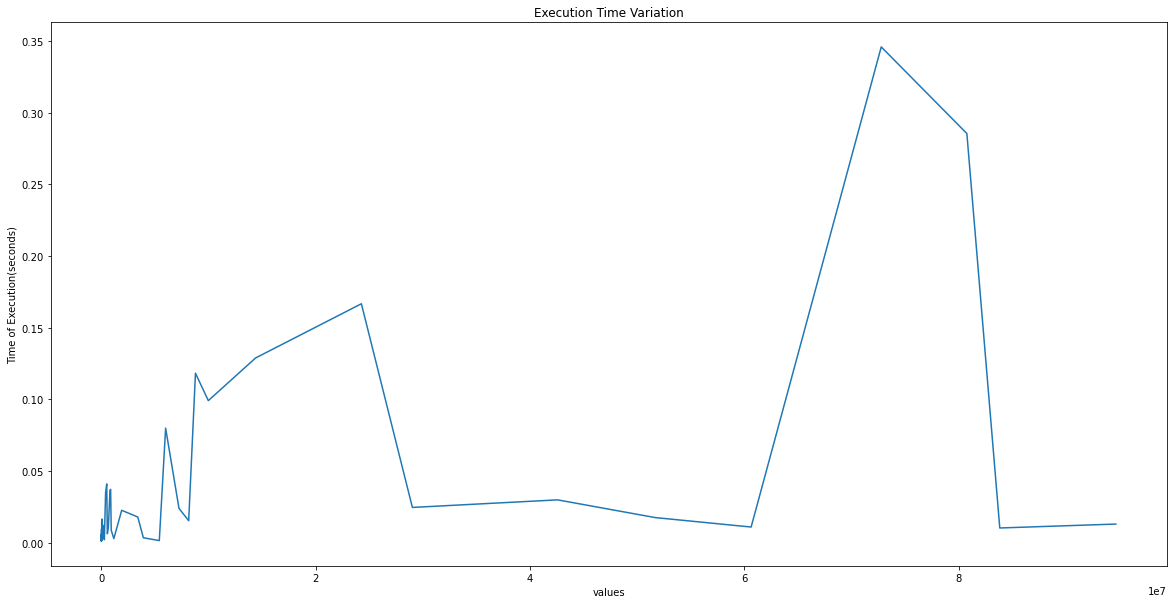

In [11]:
analysis(8,10)

### CFFA vs Fermat's non-generalized algorithm for odd non-prime numbers

In [6]:
import math as m
def fermat1(n):
    factors = []
    if n%2 == 0:
        while n%2 == 0:
            n = n/2
        factors.append(2)
    n_root = m.sqrt(n)
    k = m.ceil(n_root)  
    if k == n_root:
        factors.append([n_root,n_root])
    else:
        y2 = int(k*k-n)
        y = m.isqrt(y2)
        while y*y!=y2:
            k=k+1
            y2=int(k*k-n)
            y=m.isqrt(y2)
        factors.append([k+y,k-y])
    return factors 

In [7]:
import matplotlib.pyplot as plt
import time
import math
import sympy as sp
import random
def analysis2(B,k):
    x = []
    y1 = []
    y2=[]
    for n in range(2,B):
        start = 10**(n)
        end = 10**(n+1)
        st = (end-start)/k
        time_list2 = []
        time_list1=[]
        for i in range(1,k):
            L = random.randint(start,int(start+st))
            while L%2 == 0 or sp.isprime(L) == True:
                L = random.randint(start,int(start+st))
            start = start+ st
            s = time.perf_counter()
            fermat1(L)
            e = time.perf_counter()
            time_list2.append(e-s)
            s = time.perf_counter()
            e = time.perf_counter()
            time_list1.append(e-s)
            
        tim1 = sum(time_list1)/len(time_list1)
        tim2 = sum(time_list2)/len(time_list2)
        x.append(n+1)
        y1.append(tim1)
        y2.append(tim2)
        
    plt.figure(figsize=(20,10))
    plt.title("Execution Time Variation")
    plt.plot(x,y1, color = 'b')
    plt.plot(x,y2, color = 'r')
    plt.xlabel('No of digits')
    plt.ylabel('Time of Execution(seconds)')
    plt.legend(['CFFA','Non-Generalised FFS'])
    plt.show()

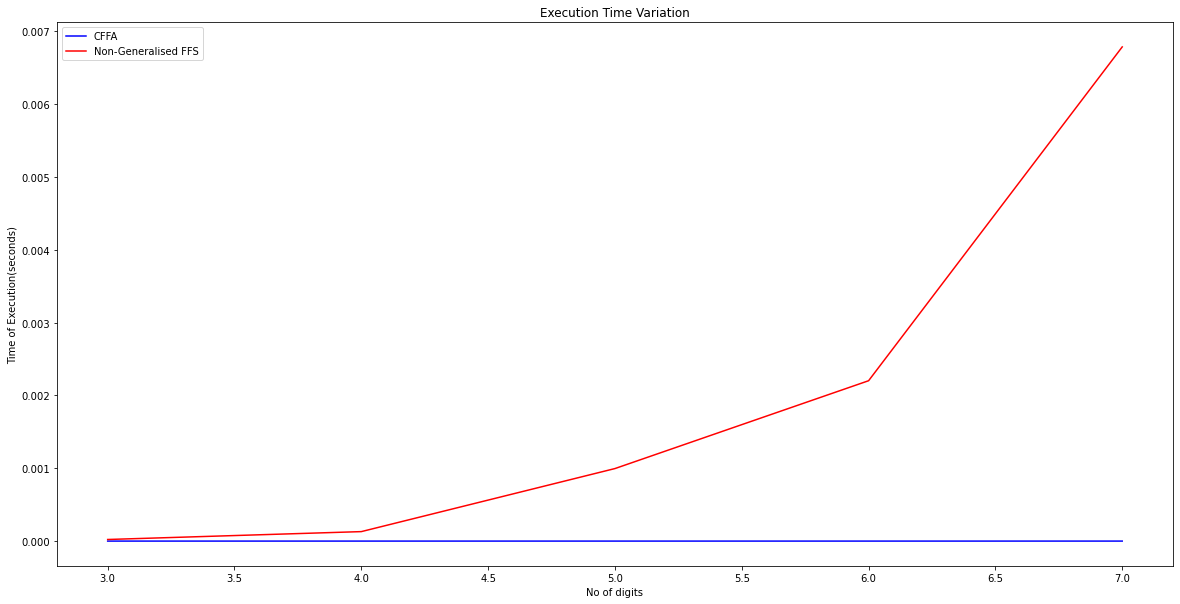

In [8]:
analysis2(7,15)